In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

#training data
trainset = datasets.FashionMNIST("~pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#testing data
testset = datasets.FashionMNIST("~pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

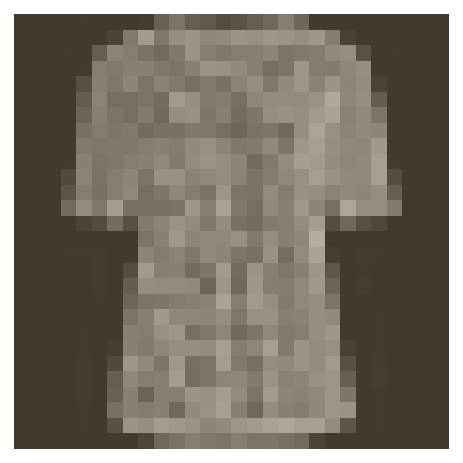

In [3]:
images, labels = next(iter(trainloader))
helper.imshow(images[0,:])

In [4]:
input_layer = 784
hidden_layers = [256, 128, 64]
output_layer = 10

model = nn.Sequential(nn.Linear(input_layer, hidden_layers[0]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[0], hidden_layers[1]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[1], hidden_layers[2]),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(hidden_layers[2], output_layer),
                    nn.Softmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): Softmax(dim=1)
)


In [5]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

epochs = 30
training_losses = []
testing_losses = []

for e in range(epochs):
    total_train_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        images = images.view(images.shape[0], -1)

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    else:
        total_test_loss = 0
        test_correct = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                loss = criterion(log_ps, labels)

                total_test_loss += loss.item() #change this

                ps = torch.exp(model(images)) #

                top_p, top_class = ps.topk(1, dim=1) #

                equals = top_class == labels.view(*top_class.shape) #

                test_correct += torch.mean(equals.type(torch.FloatTensor)) #
                #test_correct += equals.sum().item()
            
        model.train() #

        training_losses.append(total_train_loss / len(trainloader))
        testing_losses.append(total_test_loss / len(testloader))

        print("Epoch: {}/{}...".format(e+1, epochs),
        "Training Loss: {:.3f}...".format(training_losses[-1]),
        "Testing Loss: {:.3f}...".format(testing_losses[-1]),
        "Accuracy: {:.3f}...".format(test_correct/len(testloader)))

Epoch: 1/30... Training Loss: -0.132... Testing Loss: -0.244... Accuracy: 0.205...
Epoch: 2/30... Training Loss: -0.433... Testing Loss: -0.597... Accuracy: 0.628...
Epoch: 3/30... Training Loss: -0.633... Testing Loss: -0.712... Accuracy: 0.736...
Epoch: 4/30... Training Loss: -0.714... Testing Loss: -0.752... Accuracy: 0.760...
Epoch: 5/30... Training Loss: -0.748... Testing Loss: -0.770... Accuracy: 0.775...
Epoch: 6/30... Training Loss: -0.764... Testing Loss: -0.776... Accuracy: 0.781...
Epoch: 7/30... Training Loss: -0.774... Testing Loss: -0.783... Accuracy: 0.786...
Epoch: 8/30... Training Loss: -0.781... Testing Loss: -0.788... Accuracy: 0.791...
Epoch: 9/30... Training Loss: -0.786... Testing Loss: -0.792... Accuracy: 0.796...
Epoch: 10/30... Training Loss: -0.791... Testing Loss: -0.795... Accuracy: 0.798...
Epoch: 11/30... Training Loss: -0.796... Testing Loss: -0.800... Accuracy: 0.802...
Epoch: 12/30... Training Loss: -0.799... Testing Loss: -0.799... Accuracy: 0.803...
E

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt

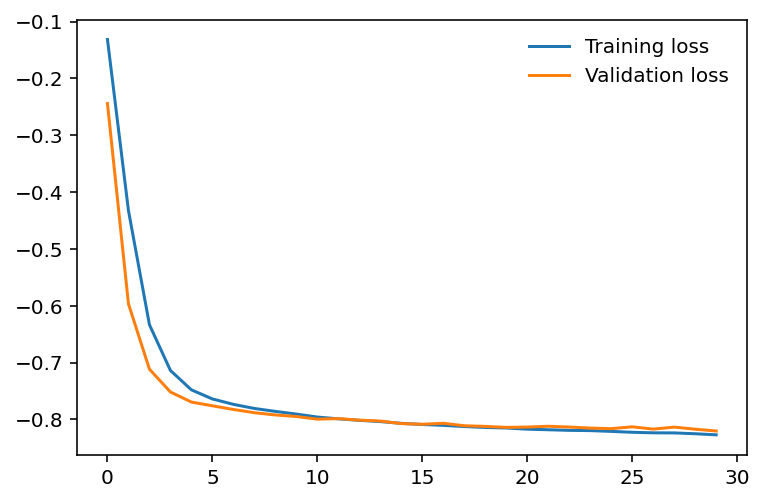

In [7]:
plt.plot(training_losses, label="Training loss")
plt.plot(testing_losses, label="Validation loss")
plt.legend(frameon=False)

tensor(4)


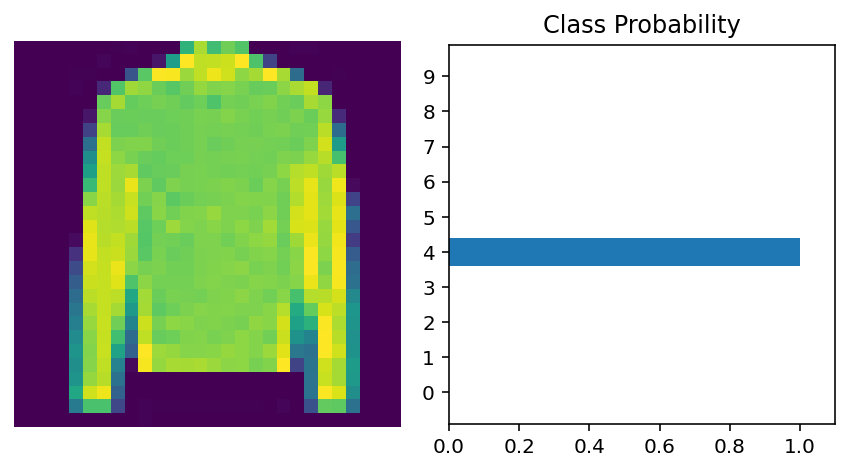

In [14]:
images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28), ps)
print(labels[0])